In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv(
    "../data/исходные данные от оператора/022C4097/log(336804182)[26-03-2024_16-06-01] 01.06-01.07.csv", delimiter=";")

In [17]:
# Удаление ненужных столбцов
df.drop(columns=["iButton2"], inplace=True)

df.replace('-', np.nan, inplace=True)

In [18]:
def convert_to_numeric_date(df):
    df['Дата и время'] = pd.to_numeric(
        df['Дата и время'], errors='coerce')  # Convert to numeric format
    # Update state mapping if necessary
    state_mapping = {"Отпущ.": 0, "Впущ.": 1, "Другое_состояние": 2}
    df['Сост.пед.сцепл.'] = df['Сост.пед.сцепл.'].replace(state_mapping)

    columns_to_drop = []
    for column in df.columns:
        mode_values = df[column].mode()
        if len(mode_values) == 0:
            columns_to_drop.append(column)
        else:
            most_common_value = mode_values[0]
            if most_common_value == '        -':
                columns_to_drop.append(column)
            else:
                df[column].fillna(most_common_value, inplace=True)

    # Drop columns with all values equal to "-"
    df.drop(columns=columns_to_drop, inplace=True)

    return df


# Применение функции к каждому DataFrame
df = convert_to_numeric_date(df)

In [19]:
df.head()

,"Темп.масла двиг.,°С",Сост.пед.сцепл.,КПП. Температура масла,КПП. Давление масла в системе смазки,Скорость,ДВС. Давление смазки,ДВС. Температура охлаждающей жидкости,"Давление в пневмостистеме (spn46), кПа",Электросистема. Напряжение,ДВС. Частота вращения коленчатого вала,...,Зарядка АКБ (spn3854),Отопитель (spn3853),Выход блока управления двигателем (spn3852),Включение тормозков (spn3859),Засоренность фильтра слива (spn3858),Аварийное давление масла КПП (spn3857),Аварийная температура масла ДВС(spn3856),Низкий уровень ОЖ (spn3860),Аварийная температура масла ГТР (spn3867),Подогрев топливного фильтра (spn3865)
0,-,-,-273,1168,0,400,83,784,27.9,0,...,0,0,0,0,0,0,0,0,0,0
1,-,-,-273,1168,0,400,83,784,27.9,0,...,0,0,0,0,0,0,0,0,0,0
2,-,-,-273,1168,0,400,83,784,27.9,0,...,0,0,0,0,0,0,0,0,0,0
3,-,-,-273,1168,0,400,83,784,27.9,0,...,0,0,0,0,0,0,0,0,0,0
4,-,-,-273,1168,0,400,83,784,27.9,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
import pandas as pd
from sklearn.impute import SimpleImputer

# Replace commas with periods and convert to numeric, handling non-numeric values
anomaly_data_numeric = df.replace(
    {'        -': pd.NA}, regex=True).apply(pd.to_numeric, errors='coerce')

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
numeric_cols_imputed = imputer.fit_transform(anomaly_data_numeric)

# Rest of your code remains the same...

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/impute/_base.py:555: UserWarning: Skipping features without any observed values: ['Темп.масла двиг.,°С']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [29]:
# Visualization of outliers
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
# Replace commas with periods and convert to numeric
anomaly_data_numeric = df.replace(',', '.', regex=True).astype(float)

# Impute missing values with mean
imputer = SimpleImputer(strategy='mean')
numeric_cols_imputed = imputer.fit_transform(anomaly_data_numeric)

# Corrected Pipeline definition
pipe = Pipeline([('scaler', StandardScaler()),
                ('dim_red', PCA(n_components=2))])

Xt = pipe.fit_transform(numeric_cols_imputed)
# generate novel/outlier points
np.random.seed(1)
theta = 2*np.pi*np.random.random(10)
X_test = np.vstack((4*np.cos(theta) + np.random.random(10),
                   4*np.sin(theta) + np.random.random(10)))
plt.scatter(*Xt.T)
plt.scatter(*X_test, c='red')
plt.xlabel('$\\xi_1$')
plt.ylabel('$\\xi_2$')
plt.legend(["training set", "novel/outliers"])
plt.show()

ValueError: could not convert string to float: '        -'

In [24]:
# Преобразование всех строковых столбцов в числовые значения
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = df[column].str.replace(
            ',', '.').astype(float)

ValueError: could not convert string to float: '        -'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189704 entries, 0 to 189703
Data columns (total 41 columns):
 #   Column                                                       Non-Null Count   Dtype  
---  ------                                                       --------------   -----  
 0   Полож.пед.акселер.,%                                         189704 non-null  float64
 1   Давл.масла двиг.,кПа                                         189704 non-null  int64  
 2   Темп.масла двиг.,°С                                          189704 non-null  int64  
 3   Обор.двиг.,об/мин                                            189704 non-null  float64
 4   КПП. Температура масла                                       189704 non-null  int64  
 5   КПП. Давление масла в системе смазки                         189704 non-null  int64  
 6   Скорость                                                     189704 non-null  int64  
 7   ДВС. Давление смазки                                         1897

In [ ]:
# from sklearn.ensemble import IsolationForest
# import pickle

# # Create and train the Isolation Forest model
# isolation_forest = IsolationForest(contamination=0.05, random_state=42)
# isolation_forest.fit(df)

# # Specify the file path where you want to save the pickle file
# file_path = 'model.pkl'

# # Save the model to a pickle file
# with open(file_path, 'wb') as f:
#     pickle.dump(isolation_forest, f)

# print("Model saved successfully as model.pkl.")

Model saved successfully as model.pkl.


In [ ]:
import pickle

# Load the saved Isolation Forest model from the pickle file
file_path = '../anomaly_detection/model.pkl'
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

# Assuming 'new_data' is the new data you want to make predictions on
# Replace 'new_data' with your actual new data
new_data = df

# Make predictions using the loaded model
anomaly_predictions = loaded_model.predict(new_data)

# 'anomaly_predictions' will contain the predictions (1 for inliers, -1 for outliers/anomalies)
# You can use these predictions according to your application needs

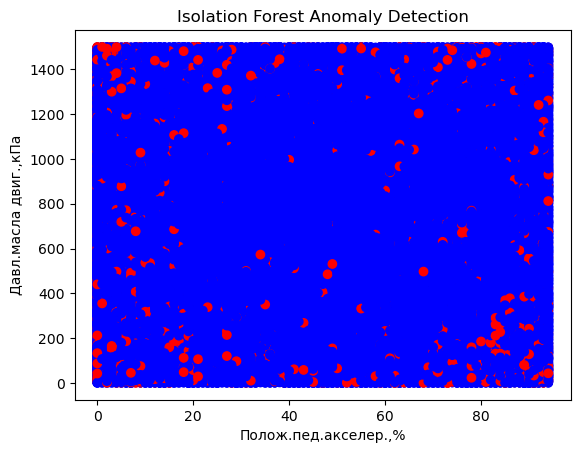

In [ ]:
# Визуализация аномальных точек пример
plt.scatter(df['Полож.пед.акселер.,%'], df['Давл.масла двиг.,кПа'], c=np.where(
    anomaly_predictions == -1, 'red', 'blue'))
plt.xlabel('Полож.пед.акселер.,%')
plt.ylabel('Давл.масла двиг.,кПа')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

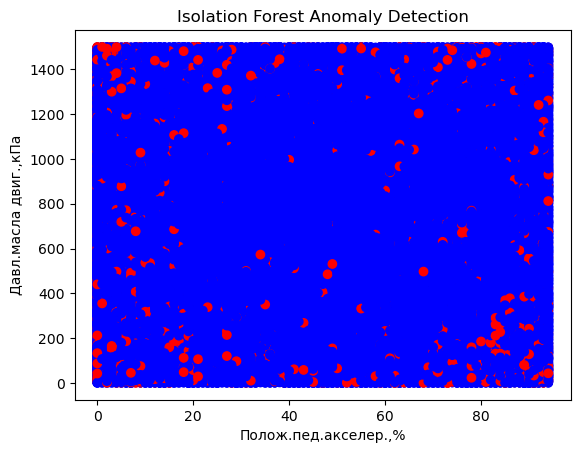

In [ ]:
# Визуализация аномальных точек пример
plt.scatter(df['Полож.пед.акселер.,%'], df['Давл.масла двиг.,кПа'], c=np.where(
    anomaly_predictions == -1, 'red', 'blue'))
plt.xlabel('Полож.пед.акселер.,%')
plt.ylabel('Давл.масла двиг.,кПа')
plt.title('Isolation Forest Anomaly Detection')
plt.show()

In [13]:
import pickle

# Load the saved Isolation Forest model from the pickle file
file_path = 'model.pkl'
with open(file_path, 'rb') as f:
    loaded_model = pickle.load(f)

new_data = df

# Make predictions using the loaded model
anomaly_predictions = loaded_model.predict(new_data)

# 'anomaly_predictions' will contain the predictions (1 for inliers, -1 for outliers/anomalies)
# You can use these predictions according to your application needs

/Users/kokosiknn/opt/anaconda3/envs/myenv/lib/python3.10/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


ValueError: could not convert string to float: '../data/исходные данные от оператора/022C4097'